# Part 2: UFC Fighters Nationalities and Training Locations

For this section of project, we wanted to find out the UFC fighters' nationalities and their training locations.

To complete this information we would need to isolate the blue and red corner fighter attributes, then combine both into one data frame and remove any fighter duplicates based on their fighter ID.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Load dataset
ufc_df = pd.read_csv("../data.csv")

ufc_df.head()

# Select relevant columns for blue corner fighters
blue_cols = [
    'B_ID', 'B_Name', 'B_Age', 'B_Height', 'B_Weight', 'B_HomeTown', 'B_Location'
]

blue_df = ufc_df[blue_cols].rename(columns=lambda x: x.replace('B_', ''))

# Select relevant columns for red corner fighters
red_cols = [
    'R_ID', 'R_Name', 'R_Age', 'R_Height', 'R_Weight', 'R_HomeTown', 'R_Location'
]
red_df = ufc_df[red_cols].rename(columns=lambda x: x.replace('R_', ''))

# Combine both into one DataFrame
fighters = pd.concat([blue_df, red_df], ignore_index=True)

# Remove duplicate fighters based on ID
unique_fighters = fighters.drop_duplicates(subset='ID').reset_index(drop=True)

# Display the result
print("Number of unique fighters:", len(unique_fighters))
print(unique_fighters.head())

Number of unique fighters: 841
     ID                   Name   Age  Height  Weight  \
0  2783         Marvin Vettori  23.0   182.0      84   
1  2208  Carlos Diego Ferreira  32.0   175.0      70   
2   721          Takanori Gomi  38.0   172.0      70   
3  2825         Brandon Moreno  23.0   170.0      56   
4  2260     Elizabeth Phillips  30.0   167.0      61   

                             HomeTown           Location  
0                        Trento Italy  Mezzocorona Italy  
1  Careiro da Várzea, Amazonas Brazil   Pharr, Texas USA  
2                      Kanagawa Japan        Tokyo Japan  
3                      Tijuana Mexico     Tijuana Mexico  
4                     Spokane, WA USA    Spokane, WA USA  


Above shows the new data frame of the unique ufc fighters, which result in a total of 841.

From here we can count the number of unique fighters by their country and plot the results.

Top 25 locations that UFC fighters were born in


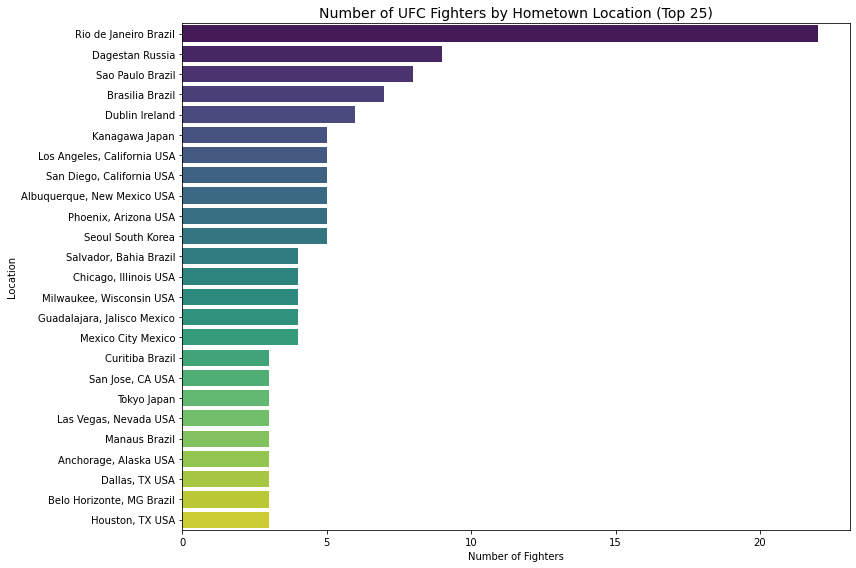

World map of where UFC fighters were born in per country


In [7]:
# Count the number of fighters per hometown location
hometown_counts = unique_fighters['HomeTown'].value_counts().head(25)

# Create a bar plot
print("Top 25 locations that UFC fighters were born in")
plt.figure(figsize=(12, 8))
sns.barplot(x=hometown_counts.values, y=hometown_counts.index, palette="viridis")
plt.title("Number of UFC Fighters by Hometown Location (Top 25)", fontsize=14)
plt.xlabel("Number of Fighters")
plt.ylabel("Location")
plt.tight_layout()
plt.show()

# Assume Hometown_Country is the last word in the 'HomeTown' column
unique_fighters['Hometown_Country'] = unique_fighters['HomeTown'].apply(
    lambda x: str(x).split()[-1] if pd.notnull(x) else 'Unknown'
).dropna()

# Create world map of ufc fighters per hometown country
hometown_country_counts = unique_fighters['Hometown_Country'].value_counts().reset_index()
hometown_country_counts.columns = ['Country', 'Fighter_Count']

print("World map of where UFC fighters were born in per country")
fig = px.choropleth(
    hometown_country_counts,
    locations="Country",
    locationmode="country names",
    color="Fighter_Count",
    color_continuous_scale="viridis",
    title="Global Distribution of UFC Fighters by Country",
)

fig.show()

From the Bar plot, we can see the city most UFC fighters were born in is Rio de Janeiro, Brazil. From the map we can see the top 5 countries UFC fighters were born in are the United States, Brazil, Canada, Mexico and Russia.

Top 25 training locations for fighters in the UFC


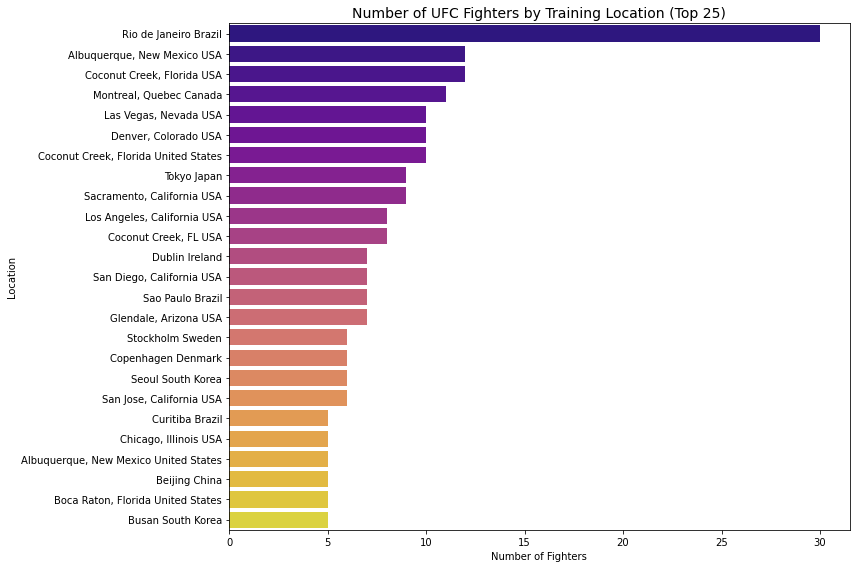

World map of training locations for UFC fighters per country


In [8]:
# Count the number of fighters per trainging location
training_location_counts = unique_fighters['Location'].value_counts().head(25)

# Create a bar plot
print("Top 25 training locations for fighters in the UFC")
plt.figure(figsize=(12, 8))
sns.barplot(x=training_location_counts.values, y=training_location_counts.index, palette="plasma")
plt.title("Number of UFC Fighters by Training Location (Top 25)", fontsize=14)
plt.xlabel("Number of Fighters")
plt.ylabel("Location")
plt.tight_layout()
plt.show()

# Assume 'Training_Country' is the last word in the 'Location' column
unique_fighters['Training_Country'] = unique_fighters['Location'].apply(
    lambda x: str(x).split()[-1] if pd.notnull(x) else 'Unknown'
).dropna()

# Create world map of ufc fighters per training location country
training_country_counts = unique_fighters['Training_Country'].value_counts().reset_index()
training_country_counts.columns = ['Country', 'Fighter_Count']

print("World map of training locations for UFC fighters per country")
fig = px.choropleth(
    training_country_counts,
    locations="Country",
    locationmode="country names",
    color="Fighter_Count",
    color_continuous_scale="plasma",
    title="Global Distribution of training locations for UFC Fighters by Country",
)

fig.show()

From the Bar plot, we can see the city most UFC fighters train from is Rio de Janeiro, Brazil. From the map, we can see the top 5 countries where UFC fighters train from are the United States, Brazil, Canada, Australia and Russia.

Out of the 1477 UFC matches between 2013 and 2017, there was a total of 841 unique fighters participating.
700 (83.23%) fighters trained from the country they were born in and 141 (16.77%) fighters moved to a different country to train for their fight.

Shows the amount of fighters per country that they were born in.


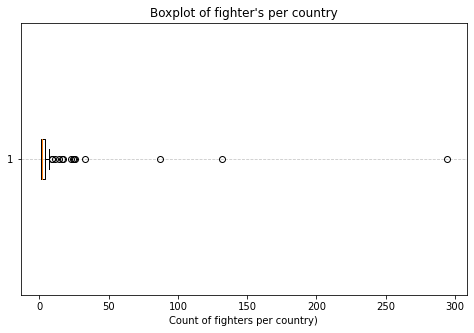

None

Shows the amount of fighters per country that they train in.


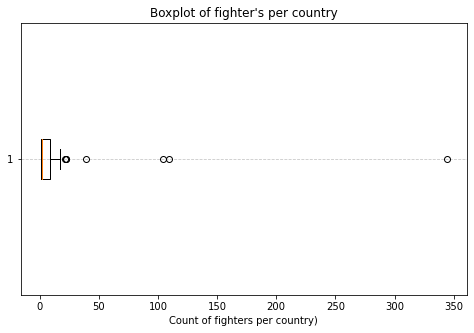

None


In [9]:
unique_fighters['Stayed_Home'] = unique_fighters.apply(
    lambda row: 1 if row['Hometown_Country'] == row['Training_Country'] else 0, axis=1
)

total_fighters = len(unique_fighters)
stayed_count = unique_fighters['Stayed_Home'].sum()
moved_count = total_fighters - stayed_count

stay_pct = round((stayed_count / total_fighters) * 100, 2)
leave_pct = round((moved_count / total_fighters) * 100, 2)

print(f"Out of the {len(ufc_df)} UFC matches between 2013 and 2017, there was a total of {total_fighters} unique fighters participating.")
print(f"{stayed_count} ({stay_pct}%) fighters trained from the country they were born in and {moved_count} ({leave_pct}%) fighters moved to a different country to train for their fight.")

def boxplot(df):
    # Mean and standard deviation for income dataframe
    mean_count = df['Fighter_Count'].mean()
    std_count = df['Fighter_Count'].std()

   # Create Boxplof of fighter's per country
    plt.figure(figsize=(8,5))
    plt.boxplot(df['Fighter_Count'], vert=False)
    plt.title(f"Boxplot of fighter's per country")
    plt.xlabel("Count of fighters per country)")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

print(f"\nShows the amount of fighters per country that they were born in.")
print(boxplot(hometown_country_counts))
print(f"\nShows the amount of fighters per country that they train in.")
print(boxplot(training_country_counts))